# ME599 - AI in Clean Energy Watt's Next

In [1]:
!pip install jupyter-collaboration
!pip install aerosandbox[full]

  Using cached jupyter_collaboration-4.0.2-py3-none-any.whl.metadata (4.6 kB)
  Using cached jupyter_collaboration_ui-2.0.2-py3-none-any.whl.metadata (4.7 kB)
  Using cached jupyter_docprovider-2.0.2-py3-none-any.whl.metadata (4.8 kB)
  Using cached jupyter_server_ydoc-2.0.2-py3-none-any.whl.metadata (5.1 kB)
  Using cached jupyterlab-4.4.2-py3-none-any.whl.metadata (16 kB)
  Using cached jupyter_events-0.12.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached jupyter_server_fileid-0.9.3-py3-none-any.whl.metadata (4.7 kB)
  Using cached jupyter_server-2.16.0-py3-none-any.whl.metadata (8.5 kB)
  Using cached jupyter_ydoc-3.0.5-py3-none-any.whl.metadata (3.1 kB)
  Using cached pycrdt_websocket-0.15.5-py3-none-any.whl.metadata (5.3 kB)
  Using cached anyio-4.9.0-py3-none-any.whl.metadata (4.7 kB)
  Using cached sqlite_anyio-0.2.3-py3-none-any.whl.metadata (3.0 kB)
Using cached jupyter_collaboration-4.0.2-py3-none-any.whl (4.6 kB)
Using cached jupyter_collaboration_ui-2.0.2-py3-none-any.whl

In [2]:
import aerosandbox as asb
import aerosandbox.numpy as np
import matplotlib.pyplot as plt
import aerosandbox.tools.pretty_plots as p
from typing import Union

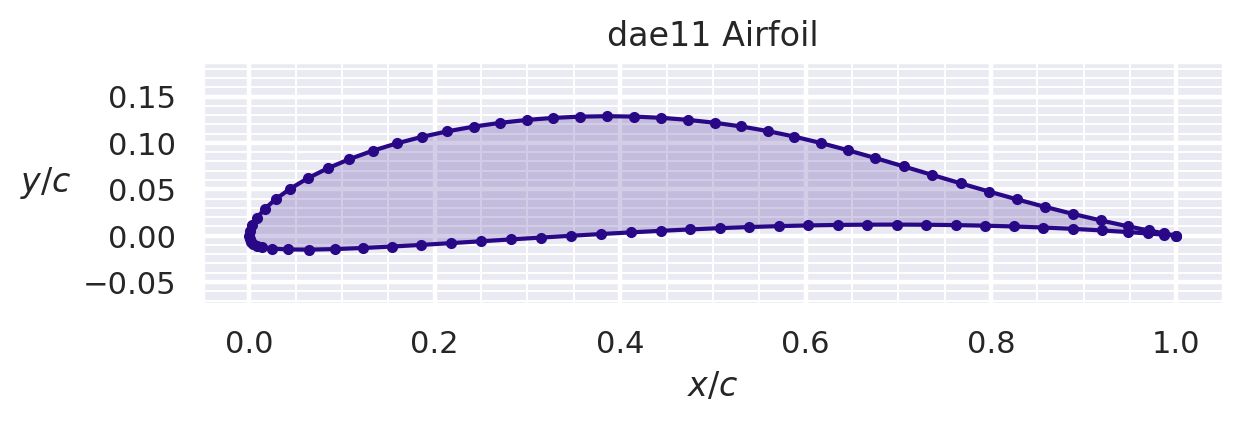

In [3]:
coordinate_airfoil = asb.Airfoil("dae11")
coordinate_airfoil
fig, ax = plt.subplots(figsize=(6, 2))
coordinate_airfoil.draw()

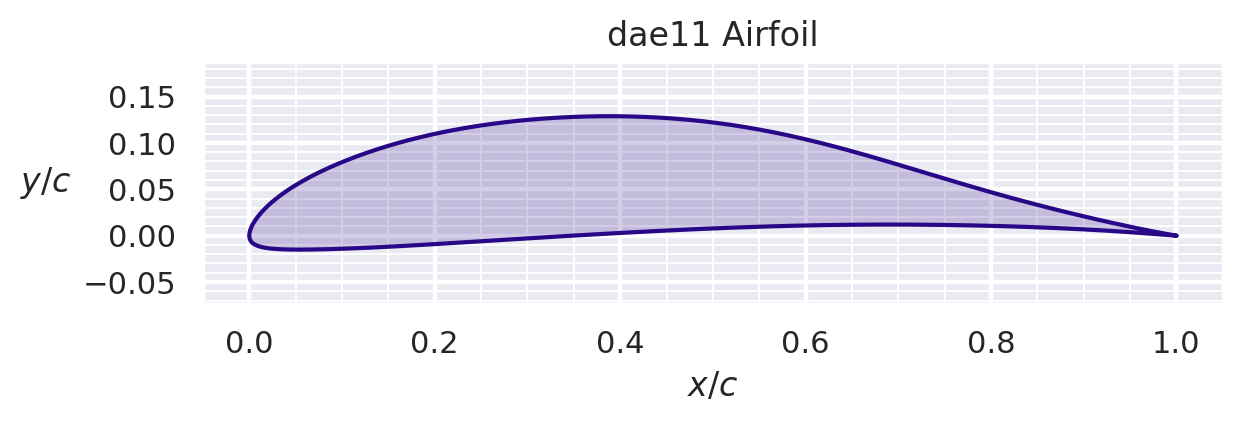

In [4]:
kulfan_airfoil = coordinate_airfoil.to_kulfan_airfoil()
kulfan_airfoil
fig, ax = plt.subplots(figsize=(6, 2))
kulfan_airfoil.draw()

In [5]:
print(kulfan_airfoil.kulfan_parameters)

{'lower_weights': array([-0.16310508, -0.14398528,  0.08896135, -0.0706084 ,  0.09741634,
        0.01466031,  0.07888292,  0.08075122]), 'upper_weights': array([0.17036014, 0.15272658, 0.51688551, 0.09212467, 0.66904449,
       0.14345864, 0.28990386, 0.16207357]), 'leading_edge_weight': 0.5035068867316296, 'TE_thickness': 0.00011059192135114138}


{'lower_weights': array([-1., -1., -1., -1., -1., -1., -1., -1.]), 'upper_weights': array([1., 1., 1., 1., 1., 1., 1., 1.]), 'leading_edge_weight': 0.9, 'TE_thickness': 0.005}


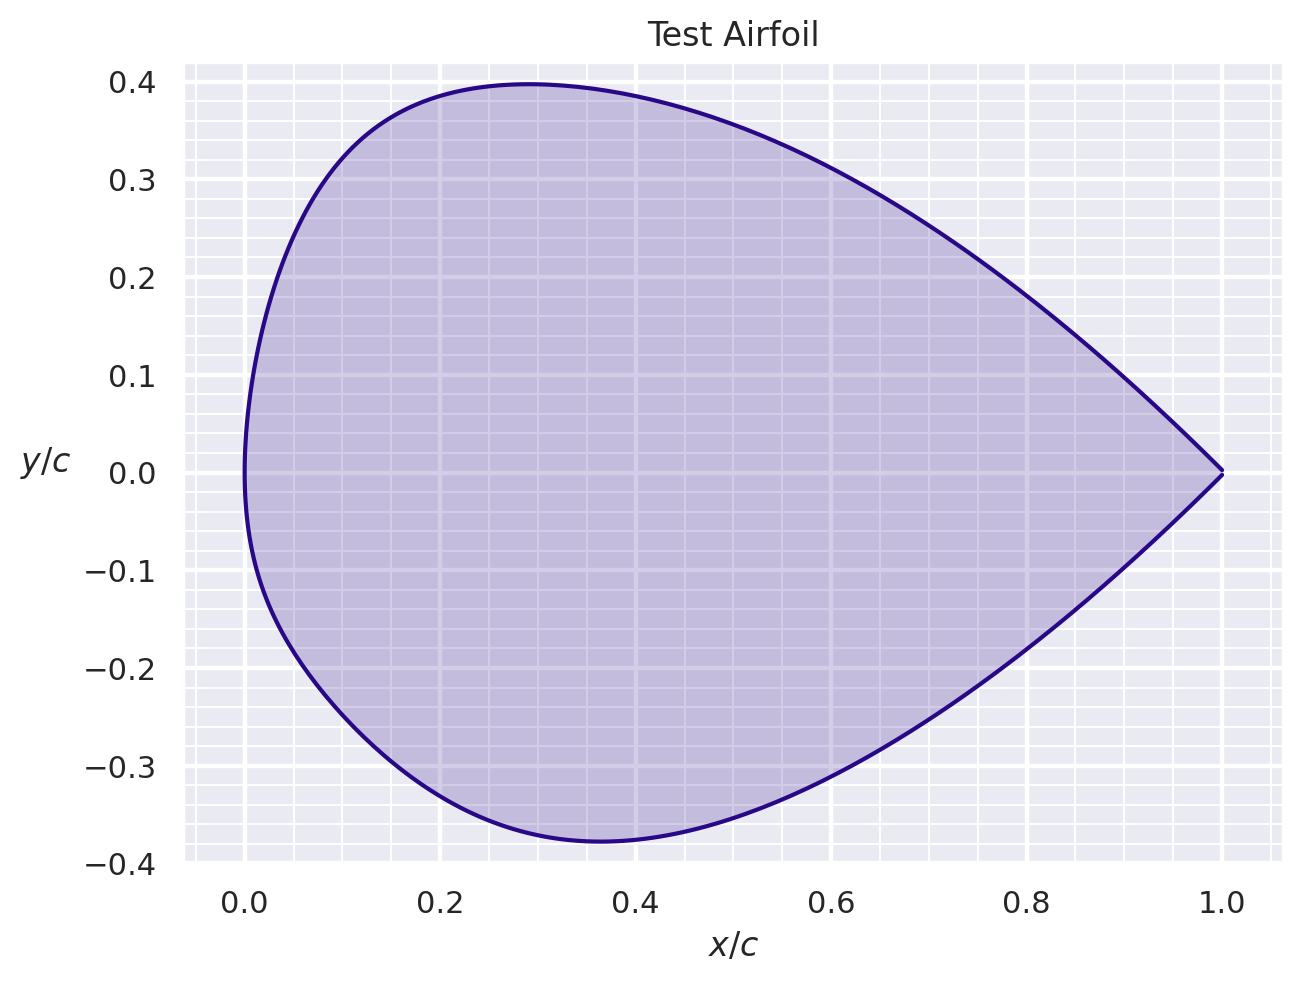

In [6]:
test = asb.KulfanAirfoil(
    name="Test",
    lower_weights=-1.0 * np.ones(8),
    upper_weights=1.0 * np.ones(8),
    leading_edge_weight=.9,
    TE_thickness=.005,
)
print(test.kulfan_parameters)
test.draw()

In [7]:
test_var = test.kulfan_parameters
test_var["lower_weights"]

array([-1., -1., -1., -1., -1., -1., -1., -1.])

In [8]:
def kulfan_to_bo(kf_params):
    list_lower = kf_params["lower_weights"]
    list_upper = kf_params["upper_weights"]
    leading_edge = kf_params["leading_edge_weight"]
    trailing_edge = kf_params["TE_thickness"]
    result = [leading_edge, trailing_edge, *list_upper, *list_lower]
    return result
    
def bo_to_kulfan(bo):
    result = {"leading_edge_weight": bo[0],
              "TE_thickness": bo[1],
              "upper_weights": bo[2:9],
              "lower_weights": bo[10:17]}
    return result
    
def make_foil(kf, name):
    foil = asb.KulfanAirfoil(
    name=name,
    lower_weights=kf["lower_weights"],
    upper_weights=kf["upper_weights"],
    leading_edge_weight=kf["leading_edge_weight"],
    TE_thickness=kf["TE_thickness"],
)
    return foil

In [9]:
bo_test = kulfan_to_bo(test.kulfan_parameters)

print(bo_test)

[0.9, 0.005, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0]


In [10]:
kf_test = bo_to_kulfan(bo_test)
print(kf_test)

{'leading_edge_weight': 0.9, 'TE_thickness': 0.005, 'upper_weights': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'lower_weights': [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0]}


In [11]:
test2 = make_foil(kf_test, "Test2")

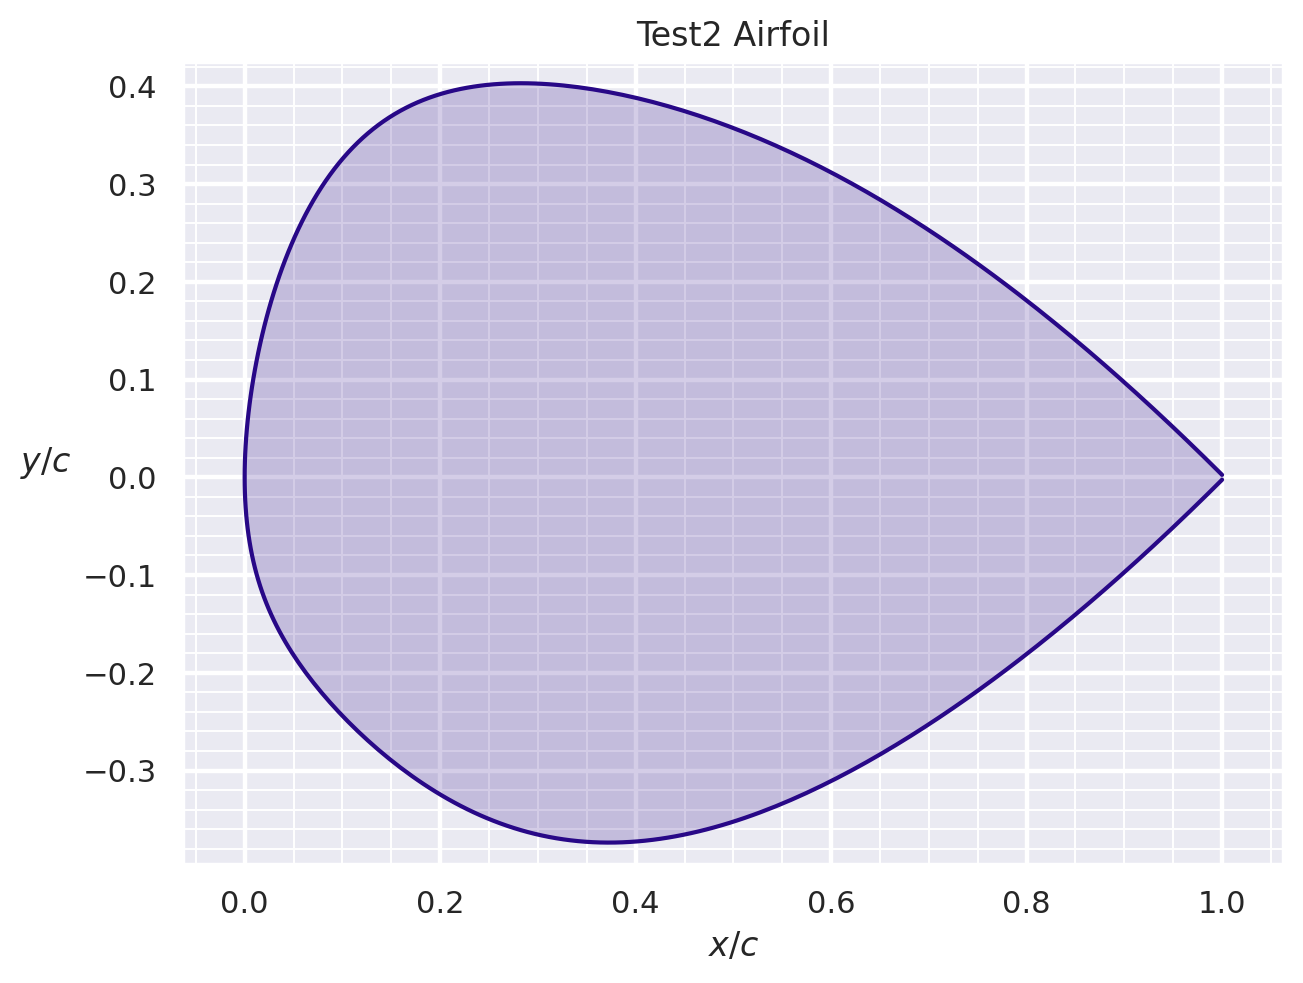

In [12]:
test2.draw()

In [13]:
dat = test2.write_dat()
dat

'Test2\n1.000000 0.002500\n0.999938 0.002562\n0.999751 0.002749\n0.999439 0.003059\n0.999003 0.003494\n0.998443 0.004052\n0.997759 0.004733\n0.996950 0.005538\n0.996018 0.006464\n0.994962 0.007513\n0.993782 0.008683\n0.992480 0.009973\n0.991055 0.011383\n0.989507 0.012911\n0.987838 0.014558\n0.986046 0.016321\n0.984134 0.018200\n0.982101 0.020193\n0.979948 0.022300\n0.977675 0.024518\n0.975284 0.026847\n0.972774 0.029285\n0.970146 0.031831\n0.967400 0.034482\n0.964539 0.037238\n0.961561 0.040097\n0.958469 0.043056\n0.955262 0.046114\n0.951942 0.049269\n0.948509 0.052519\n0.944964 0.055862\n0.941309 0.059296\n0.937544 0.062818\n0.933669 0.066428\n0.929686 0.070121\n0.925597 0.073896\n0.921401 0.077750\n0.917100 0.081682\n0.912695 0.085688\n0.908188 0.089766\n0.903579 0.093914\n0.898869 0.098128\n0.894059 0.102407\n0.889152 0.106747\n0.884147 0.111146\n0.879047 0.115600\n0.873852 0.120108\n0.868565 0.124665\n0.863185 0.129270\n0.857715 0.133919\n0.852155 0.138610\n0.846508 0.143338\n0.84